In [1]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

## Making a Controlled-Z from a CNOT 

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
from math import pi
qc = QuantumCircuit(2)
c = 0
t = 1

1. HXH=Z 
2. controlled-Y
3. controlled-H

In [3]:
# a controlled-Z
qc.cz(c,t)
qc.draw()

q_0: ─■─
      │ 
q_1: ─■─

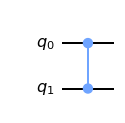

In [4]:
qc.draw('mpl')

In [5]:
qc = QuantumCircuit(2)
# also a controlled-Z
qc.h(t)
qc.cx(c,t)
qc.h(t)
qc.draw()

q_0: ───────■───────
     ┌───┐┌─┴─┐┌───┐
q_1: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

In [6]:
qc = QuantumCircuit(2)
# a controlled-Y
qc.sdg(t)
qc.cx(c,t)
qc.s(t)
qc.draw()

q_0: ─────────■───────
     ┌─────┐┌─┴─┐┌───┐
q_1: ┤ Sdg ├┤ X ├┤ S ├
     └─────┘└───┘└───┘

In [7]:
qc = QuantumCircuit(2)
# a controlled-H
qc.ry(pi/4,t)
qc.cx(c,t)
qc.ry(-pi/4,t)
qc.draw()

q_0: ─────────────■──────────────
     ┌─────────┐┌─┴─┐┌──────────┐
q_1: ┤ Ry(π/4) ├┤ X ├┤ Ry(-π/4) ├
     └─────────┘└───┘└──────────┘

## 2. Swapping Qubits

In [8]:
a = 0
b = 1

qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.swap(a,b)
qc.draw()

q_0: ─X─
      │ 
q_1: ─X─

In [9]:
qc = QuantumCircuit(2)
# swap a 1 from a to b
qc.cx(a,b) # copies 1 from a to b
qc.cx(b,a) # uses the 1 on b to rotate the state of a to 0
qc.draw()
#q_0=1 q_1=0 => ok
#q_0=0 q_1=1 => X

┌───┐
q_0: ──■──┤ X ├
     ┌─┴─┐└─┬─┘
q_1: ┤ X ├──■──
     └───┘

In [10]:
# swap a q from b to a
qc.cx(b,a) # copies 1 from b to a
qc.cx(a,b) # uses the 1 on a to rotate the state of b to 0
qc.draw()
#q_0:1 q_1:0 => unchange
#q_0:0 q_1:1 => unchange

┌───┐┌───┐     
q_0: ──■──┤ X ├┤ X ├──■──
     ┌─┴─┐└─┬─┘└─┬─┘┌─┴─┐
q_1: ┤ X ├──■────■──┤ X ├
     └───┘          └───┘

In [11]:
qc = QuantumCircuit(2)
qc.cx(b,a)
qc.cx(a,b)
qc.cx(b,a)
qc.draw()

┌───┐     ┌───┐
q_0: ┤ X ├──■──┤ X ├
     └─┬─┘┌─┴─┐└─┬─┘
q_1: ──■──┤ X ├──■──
          └───┘

In [12]:
from qiskit import assemble,Aer

sim = Aer.get_backend('aer_simulator')
qc = QuantumCircuit(2,2)
# swaps states of qubits a and b
initial_state1 = [1,0] #0
initial_state2 = [0,1] #1
qc.initialize(initial_state1, 0)
qc.initialize(initial_state2, 1)
#qc.x(1)
#qc.id(0)
qc.swap(a,b)
qc.measure([0,1], [0,1])

qc.draw()

qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
#plot_histogram(counts)  # Display the output on measurement of state vector
print(counts)

{'01': 1024}


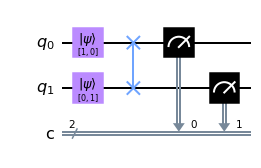

In [13]:
qc.draw('mpl')

## 3. Controlled Rotations

* The net effect in this case is therefore to make a controlled version of the rotation Ry(θ).
* If the control qubit is in state  
|
1
⟩
 , however, the ry(-theta/2) is effectively preceded and followed by an X gate. This has the effect of flipping the direction of the y rotation and making a second  
R
y
(
θ
/
2
)
 . The net effect in this case is therefore to make a controlled version of the rotation  
R
y
(
θ
)
 

In [14]:
qc = QuantumCircuit(2)
theta = pi # theta can be anything (pi chosen arbitrarily)
qc.ry(theta/2,t)
qc.cx(c,t)
qc.ry(-theta/2,t)
qc.cx(c,t)
qc.draw()

q_0: ─────────────■────────────────■──
     ┌─────────┐┌─┴─┐┌──────────┐┌─┴─┐
q_1: ┤ Ry(π/2) ├┤ X ├┤ Ry(-π/2) ├┤ X ├
     └─────────┘└───┘└──────────┘└───┘

* It therefore similarly works to make a controlled  Rz(θ). 
* A controlled Rx(θ) could similarly be made using CNOT gates.

## 4. The Toffoli

In [15]:
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
# Toffoli with control qubits a and b and target t
qc.ccx(a,b,t)
qc.draw()

q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

*  an arbitrary controlled-controlled-U for any single-qubit rotation U. 
* For this we need to define controlled versions of V=√U and V†

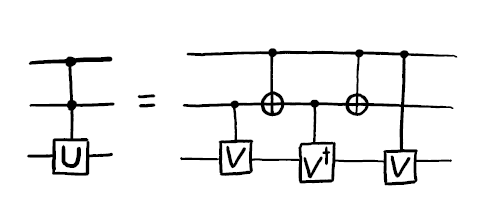

In [16]:
from IPython.display import Image
Image(filename="D:/Downloads/t0217.PNG")

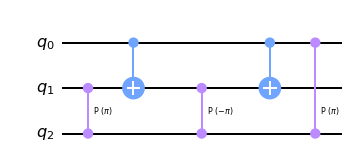

In [17]:
qc = QuantumCircuit(3)
qc.cp(theta,b,t)
qc.cx(a,b)
qc.cp(-theta,b,t)
qc.cx(a,b)
qc.cp(theta,a,t)
qc.draw('mpl')

*  the value of the target is only changed for the  |11⟩
  state on the controls -- but it does it with the equivalent of just three CNOT gates.

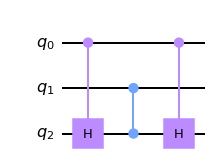

In [18]:
qc = QuantumCircuit(3)
qc.ch(a,t)
qc.cz(b,t)
qc.ch(a,t)
qc.draw('mpl')

##  5.Arbitrary rotations from H and T

* use the T gate to create a similar rotation around the x axis.

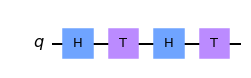

In [19]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)
qc.draw('mpl')

In [20]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [21]:
import qiskit.tools.jupyter
%qiskit_version_table

In [22]:
from qiskit import QuantumRegister,QuantumCircuit
from qiskit.tools.visualization import plot_histogram, circuit_drawer

# Define toffoli gate
def toffoli1(c0, c1, t, q, qc):
    qc.h(q[t])
    qc.cx(q[c1], q[t])
    qc.tdg(q[t])
    qc.cx(q[c0], q[t])
    qc.t(q[t])
    qc.cx(q[c1], q[t])
    qc.tdg(q[t])
    qc.cx(q[c0], q[t])
    qc.t(q[c1])
    qc.t(q[t])
    qc.cx(q[c0], q[c1])
    qc.h(q[t])
    qc.t(q[c0])
    qc.tdg(q[c1])
    qc.cx(q[c0], q[c1])
    
q = QuantumRegister(3)
qc = QuantumCircuit(q)
toffoli1(0, 1, 2, q, qc)
circuit_drawer(qc)

┌───┐      
q4_0: ───────────────────■─────────────────────■────■───┤ T ├───■──
                         │             ┌───┐   │  ┌─┴─┐┌┴───┴┐┌─┴─┐
q4_1: ───────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ Tdg ├┤ X ├
      ┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌─┴─┐├───┤└┬───┬┘└───┘
q4_2: ┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├──────
      └───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ └───┘